
Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

Defining the dataset

 Link : https://drive.google.com/drive/folders/1-QOrDBpVvXWb_zAsaxZnalmvUQRA7yOb

In [12]:
train = pd.read_csv('/content/Training Data.csv')
test = pd.read_csv('/content/Testing Data.csv')

In [13]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [15]:
test.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [16]:
test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


1.What's the ratio of Male to Female?

<Axes: title={'center': 'Gender'}>

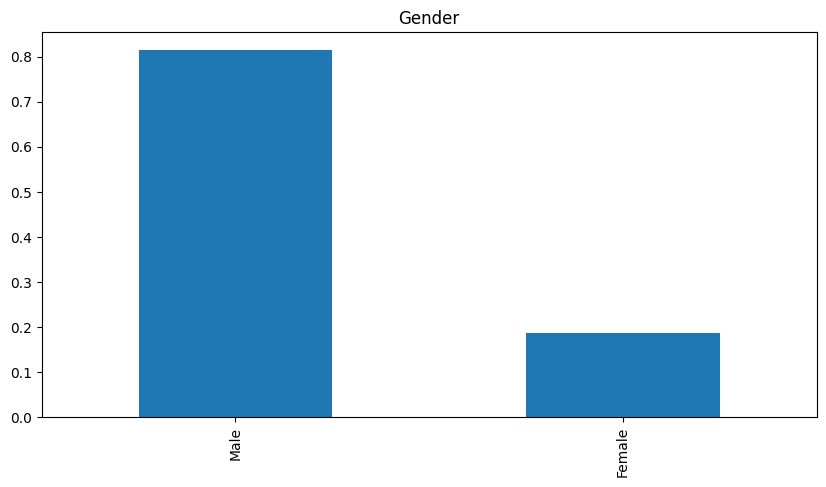

In [17]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,5), title= 'Gender')

2.How many Males are married and non-married?

In [19]:
# Count the number of married males in the dataset
num_married_males = train[train['Gender'] == 'Male']['Married'].value_counts().get('Yes', 0)

# Count the number of non-married males in the dataset
num_non_married_males = train[train['Gender'] == 'Male']['Married'].value_counts().get('No', 0)

# Print the results
print('Number of married males:', num_married_males)
print('Number of non-married males:', num_non_married_males)

Number of married males: 357
Number of non-married males: 130


3.How many Females are married and non-married?

In [20]:
# Count the number of married males in the dataset
num_married_females = train[train['Gender'] == 'Female']['Married'].value_counts().get('Yes', 0)

# Count the number of non-married males in the dataset
num_non_married_females = train[train['Gender'] == 'Female']['Married'].value_counts().get('No', 0)

# Print the results
print('Number of married females:', num_married_females)
print('Number of non-married females:', num_non_married_females)

Number of married females: 31
Number of non-married females: 80


4.How many Males and Females are graduated and non-graduated with respect to their Marital status?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


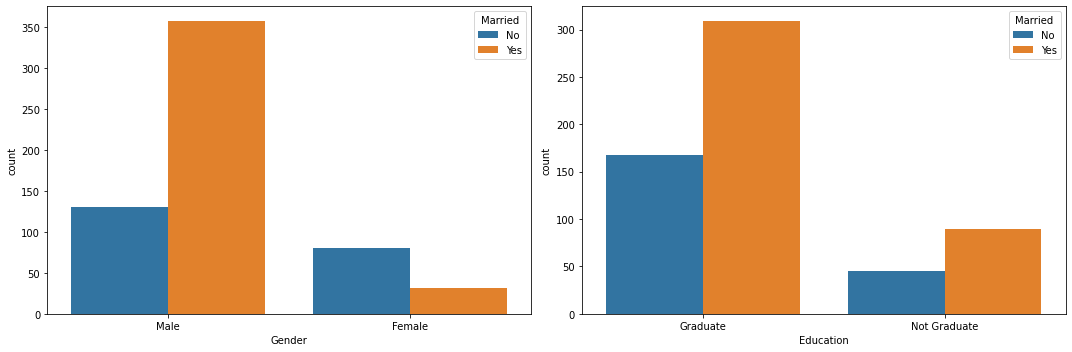

In [ ]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Education']):
	plt.subplot(1, 2, i+1)
	sns.countplot(train[col], hue=train['Married'])
plt.tight_layout()
plt.show()

5.Which type of encoding will be required to perform on the "Education" column?

   in Education column we use Ordinal Encoding because in ordinal encoding Where order of the categories does matter.

example,
  12th order is 0,Bachelors order is 1,Masters order is 2 and Phd order is 3 and so on.      

6.Is it a male or a female whose loan amount is the highest?

In [ ]:
train.groupby('Gender').mean()['LoanAmount']

Gender
Female    126.697248
Male      149.265957
Name: LoanAmount, dtype: float64

in this Data set Male loan amount is the higher then Female


7.the specification and information about the applicant who has the highest income?

In [ ]:
max(train['ApplicantIncome'])

81000

higher income is 81000

8.What all features are you going to consider for the model training and why?

1.**Preprocessing of Data** : A data mining technique that involves transforming raw data into an understandable format.Look for an automated machine learning platform that knows how to best prepare data for each different algorithm, recognizes and prepares text, and follows best practice for data partitioning.

2.**Feature Engineering** : Feature engineering is the process of altering the data to help machine learning algorithms work better, which is often time-consuming and expensive.Look for an automated machine learning platform that can automatically engineer new features from existing numeric, categorical, and text features. You will want a system that knows which algorithms benefit from extra feature engineering and which don’t, and only generates features that make sense given the data characteristics.

3.**Algorithm Selection** : Having hundreds of algorithms available at your fingertips is great, but unless you are more patient than I am, you don’t have time to try each and every one of those algorithms on your data. Some algorithms aren’t suited to your data, some are not suited to your data sizes, and some are extremely unlikely to work well on your data.

4.**Training and Tuning** : It’s quite standard for machine learning software to train the algorithm on your data. After all, you wouldn’t want to manually do Newton-Raphson iteration would you? Probably not. But, often there’s still the hyperparameter tuning to worry about. Then you want to do feature selection, to improve both the speed and accuracy of a model.Look for an automated machine learning platform that uses smart hyperparameter tuning, not just brute force, and knows the most important hyperparameters to tune for each algorithm. Check whether the platform knows which features to include and which to leave out, and which feature selection method works best for different algorithms.

5.**Human-Friendly Insights** : an automated machine learning platform that explains model decisions in a human-interpretable manner. The platform should show which features are most important for each model and show the patterns fitted for each feature. Ask whether the platform can provide worked examples, including the key reasons why a prediction is either high or low. Check whether the platform automatically writes detailed model documentation, and how well that documentation complies with your regulator’s requirements.

6.**Easy Deployment** : an automated machine learning platform that offers easy deployment, including one-click deploy, that can be operated by a business person. Ask how many deployment options are available, whether models can be deployed on your standard system hardware, and whether the platform pre-tests exported scoring code to ensure it generates the same answers as in training.

7.**Model Monitoring and Management** : In a constantly changing world, your AI applications need to keep up to date with the latest trends. Look for an automated machine learning platform that proactively identifies when a model’s performance is deteriorating over time, making it easy to compare predictions to actual results, simplifying the task of training a new model on the latest data.

9.Which model are you going to choose and define the reason for going with the same model?

there are many models in Machine Lerning Like, Classification Model,Clustring Model, Regression Models, Dimensionality Reduction Model,Deep Learning Models etc.

but i choose Classification Model Because Based on different business goals and data sets, there are three learning models for algorithms. Each machine learning algorithm settles into one of the three models:

1.Supervised Learning
2.Unsupervised Learning
3.Reinforcement Learning

Classification is a **Supervised** Learning Model.

**Classification** : which are used to generate conclusions from observed values in the categorical form. For example, the classification model can identify if the email is spam or not; a buyer will purchase the product or not, etc. Classification algorithms are used to predict two classes and categorize the output into different groups.In classification, a classifier model is designed that classifies the dataset into different categories, and each category is assigned a label.

two types of classifications:

**1.Binary classification** : If the problem has only two possible classes, called a binary classifier. For example, cat or dog, Yes or No.

**2.Multi-class classification** : If the problem has more than two possible classes, it is a multi-class classifier.



10.Have you performed the Hyper Parameter Tuning?

  No, but Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning.xample of a model hyperparameter is the topology and size of a neural network. Examples of algorithm hyperparameters are learning rate and batch size as well as mini-batch size. Batch size can refer to the full data sample where mini-batch size would be a smaller sample set.

12.What's the accuracy of your model?

In [ ]:
nb_samples = 1000
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(xtrain, ytrain)
r2_score(ytest, model.predict(xtest))

0.7583031580924129

accuracy of my model is 75.

13.In order to improve the accuracy, what more approaches can be done?
     
**Add more data** : Having more data is always a good idea. It allows the “data to tell for itself,” instead of relying on assumptions and weak correlations. Presence of more data results in better and accurate models.

**Treat missing and Outlier values** : The unwanted presence of missing and outlier values in the training data often reduces the accuracy of a model or leads to a biased model. It leads to inaccurate predictions. This is because we don’t analyse the behavior and relationship with other variables correctly. So, it is important to treat missing and outlier values well.

 **Feature Engineering** : Feature engineering is the process of altering the data to help machine learning algorithms work better, which is often time-consuming and expensive.Look for an automated machine learning platform that can automatically engineer new features from existing numeric, categorical, and text features. You will want a system that knows which algorithms benefit from extra feature engineering and which don’t, and only generates features that make sense given the data characteristics.

 **Feature Selection** : Feature Selection is a process of finding out the best subset of attributes which better explains the relationship of independent variables with target variable.

14.What can you conclude with respect to the data?

In this data Male get higher amount of loan compere to Female.also in data two type of Male or Female Graduate and Non Graduate.
 It is done by predicting if the loan can be given to that person on the basis of various parameters like credit score, income, age, marital status, gender, etc. The prediction model not only helps the applicant but also helps the bank by minimizing the risk and reducing the number of defaulters.
 It's a classification problem , given information about the application we have to predict whether the they'll be to pay the loan or not. We'll start by exploratory data analysis , then preprocessing , and finally we'll be testing different models such as Logistic regression and decision trees.